Ejemplo de https://gregorygundersen.com/blog/2019/11/02/metropolis-hastings/

In [11]:
import numpy as np
from   numpy.random import multivariate_normal as mvn
import matplotlib.pyplot as plt

Consideremos la densidad de Rosenbrok:

$$
\pi^{\ast}(x, y; a, b) = exp\left( - \frac{(a-x)^2 + b(y-x^2)^2}{20} \right)
$$

<img src="plots/rosenbrock.png" width=800 />

In [1]:
n_iters    = 1000
samples    = np.empty((n_iters, 2))
samples[0] = np.random.uniform(low=[-3, -3], high=[3, 10], size=2)
rosen      = lambda x, y: np.exp(-((1 - x)**2 + 100*(y - x**2)**2) / 20)

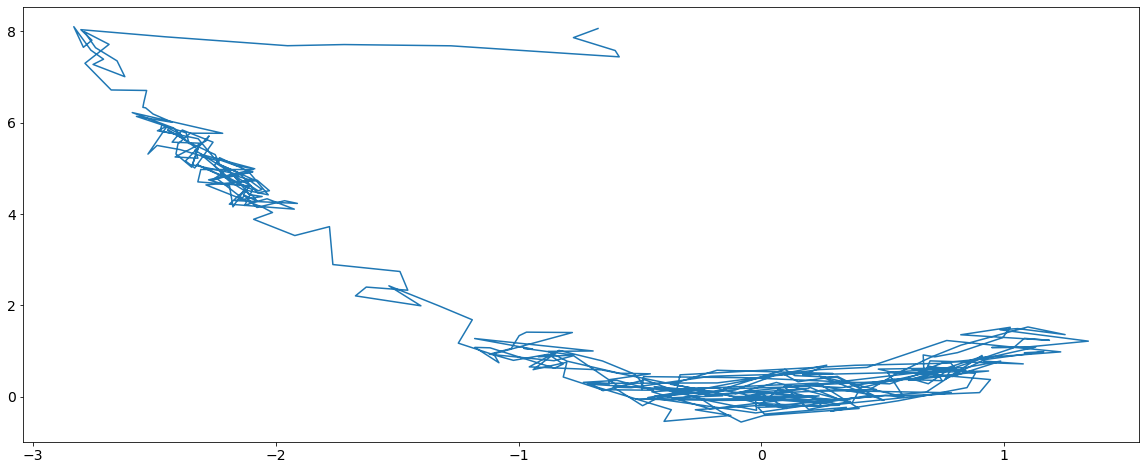

In [9]:
for i in range(1, n_iters):
    curr  = samples[i-1]
    prop  = curr + mvn(np.zeros(2), np.eye(2) * 0.1)
    alpha = rosen(*prop) / rosen(*curr)
    if np.random.uniform() < alpha:
        curr = prop
    samples[i] = curr

fig = plt.figure(figsize=(20,8))
plt.plot(samples[:, 0], samples[:, 1])
plt.show()